In [8]:
import numpy as np
k_o = 0.499
alpha_prime = 0.499

#testing inverse solution
K = np.array([[1,-1,2],[3,2,0],[3,2,0]])
I = np.identity(3)
y = np.array([1,1,-1])
c = 100
W = K-np.dot((1/c),I)
a = np.linalg.solve(W, y)
print(a)

A = np.array([[4,7],[2,6]])
I_2 = np.identity(2)
print(np.linalg.solve(A, I_2))

#K matrix without exceptions
def K_block(n, k_o):
    A = np.identity(n-1)
    D = A
    k_oArr = k_o * np.ones(n-2)
    B = np.diag(k_oArr, k=1) + np.diag(k_oArr, k=-1)
    C = B
    return np.block([[A,B],[B,A]])    
    
#def tridiag_exception()

[  771.92931353 -1163.21002039  -963.21002039]
[[ 0.6 -0.7]
 [-0.2  0.4]]


In [9]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [10]:
import numpy as np
A = np.array([[1,1]])
C = 3 * A
B = np.array([[2]])
D = 2 * B
np.block([[A,B],[C,D]])

array([[1, 1, 2],
       [3, 3, 4]])

In [11]:
import numpy as np

# Define sub-blocks as 2D arrays
A = np.array([[1, 1]])  # 1x2 array
B = np.array([[2]])     # 1x1 array

# Element-wise multiplication to scale the arrays
C = 3 * A  # Multiplies each element in A by 3, resulting in a 1x2 array
D = 2 * B  # Multiplies each element in B by 2, resulting in a 1x1 array

# Combine these sub-blocks into a block matrix using np.block
block_matrix = np.block([[A, B],
                         [C, D]])

print(block_matrix)


[[1 1 2]
 [3 3 4]]


In [12]:
import numpy as np
n=7
k_o = 0.5
diag_len = n-1
B = k_o * np.diag(np.ones((diag_len)), k=1) + k_o * np.diag(np.ones((diag_len)), k=-1)
print(B)

[[0.  0.5 0.  0.  0.  0.  0. ]
 [0.5 0.  0.5 0.  0.  0.  0. ]
 [0.  0.5 0.  0.5 0.  0.  0. ]
 [0.  0.  0.5 0.  0.5 0.  0. ]
 [0.  0.  0.  0.5 0.  0.5 0. ]
 [0.  0.  0.  0.  0.5 0.  0.5]
 [0.  0.  0.  0.  0.  0.5 0. ]]


In [13]:
import numpy as np

n=7
k_o = 0.499
k_s = 1
alpha = 1 - (2 * (k_o/k_s))
alpha_prime = k_o/k_s

#K matrix without exceptions
def k_block(n, k_o, return_k):
    arr_len = n-1
    A = np.identity(arr_len)
    D = A
    diag_len = arr_len-1
    B = k_o * np.diag(np.ones((diag_len)), k=1) + k_o * np.diag(np.ones((diag_len)), k=-1)
    C = B
    E = np.block([[A,B],[B,A]]) 
    if return_k == False:
        return B
    else:
        return E

def e_i(n, i):
    len_arr = n-1
    array_pos = i-1     #(-1 to normalize), p and q refer to normal indices (from 1 to len_arr)
    arr = np.zeros(len_arr)
    if i > 0 and i < n: #if outside, k_o excluded from similarity matrix e.g. AE exception for n=5
        arr[array_pos] = 1 
    return arr

p = 4
q = 2

#columns in k matrix representing exceptions
def k_exp_horiz(n, p, q, k_o):
    A = e_i(n, p) + e_i(n, q-1)
    B = e_i(n, q) + e_i(n, p-1)
    C = e_i(n, p-1) + e_i(n, q)
    D = e_i(n, q-1) + e_i(n, p)
    E = k_o * np.block([[A,C],[B,D]])

    print('A', A)
    print('B', B)
    print('C', C)
    print('D', D)
    return E


K = k_block(n, k_o, True)
E_1 = k_exp_horiz(n, p, q, k_o)
E_2 = E_1.transpose()
E_3 = np.identity(2) #2 since there's only 2 columns for exceptions

print('K', K)
print('E_1', E_1)
print('E_2', E_2)
print('E_3', E_3)

def k_block_excep(K, E_1, E_2, E_3):
    W = np.concatenate([K, E_1])
    print('W', W)
    X = np.concatenate([E_2, E_3])
    print('X', X)
    Z = np.concatenate([W, X], 1)
    print('Z', Z)
    return Z

K = k_block_excep(K, E_1, E_2, E_3)
print(K)





A [1. 0. 0. 1. 0. 0.]
B [0. 1. 1. 0. 0. 0.]
C [0. 1. 1. 0. 0. 0.]
D [1. 0. 0. 1. 0. 0.]
K [[1.    0.    0.    0.    0.    0.    0.    0.499 0.    0.    0.    0.   ]
 [0.    1.    0.    0.    0.    0.    0.499 0.    0.499 0.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.    0.    0.499 0.    0.499 0.    0.   ]
 [0.    0.    0.    1.    0.    0.    0.    0.    0.499 0.    0.499 0.   ]
 [0.    0.    0.    0.    1.    0.    0.    0.    0.    0.499 0.    0.499]
 [0.    0.    0.    0.    0.    1.    0.    0.    0.    0.    0.499 0.   ]
 [0.    0.499 0.    0.    0.    0.    1.    0.    0.    0.    0.    0.   ]
 [0.499 0.    0.499 0.    0.    0.    0.    1.    0.    0.    0.    0.   ]
 [0.    0.499 0.    0.499 0.    0.    0.    0.    1.    0.    0.    0.   ]
 [0.    0.    0.499 0.    0.499 0.    0.    0.    0.    1.    0.    0.   ]
 [0.    0.    0.    0.499 0.    0.499 0.    0.    0.    0.    1.    0.   ]
 [0.    0.    0.    0.    0.499 0.    0.    0.    0.    0.    0.    1.   ]]
E_1 [[0.4

In [14]:
def K_exp_create(n,p,q,k_o):
    K = k_block(n, k_o, True)
    E_1 = k_exp_horiz(n, p, q, k_o)
    E_2 = E_1.transpose()
    E_3 = np.identity(2) #2 since there's only 2 columns for exceptions
    W = np.concatenate([K, E_1])
    X = np.concatenate([E_2, E_3])
    Z = np.concatenate([W, X], 1)
    return Z

K_exp_create(4, 4, 2, k_o)
print(K_exp_create(4, 4, 2, k_o) == K)

A [1. 0. 0.]
B [0. 1. 1.]
C [0. 1. 1.]
D [1. 0. 0.]
A [1. 0. 0.]
B [0. 1. 1.]
C [0. 1. 1.]
D [1. 0. 0.]
False


C:\Users\lukel\AppData\Local\Temp\ipykernel_72156\354681684.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print(K_exp_create(4, 4, 2, k_o) == K)


In [15]:
np.linalg.det(K)

2.150033253074789e-05

In [16]:
print(K)
I = np.identity(n-1)

def create_y(n):
    A = np.ones(n-1)
    B = A * -1
    C = np.array([1, -1])
    D = np.concatenate([A, B, C])
    return D
y = create_y(n)
print('y', y)
a = np.linalg.solve(K, y)
print(a)

[[1.    0.    0.    0.    0.    0.    0.    0.499 0.    0.    0.    0.
  0.499 0.   ]
 [0.    1.    0.    0.    0.    0.    0.499 0.    0.499 0.    0.    0.
  0.    0.499]
 [0.    0.    1.    0.    0.    0.    0.    0.499 0.    0.499 0.    0.
  0.    0.499]
 [0.    0.    0.    1.    0.    0.    0.    0.    0.499 0.    0.499 0.
  0.499 0.   ]
 [0.    0.    0.    0.    1.    0.    0.    0.    0.    0.499 0.    0.499
  0.    0.   ]
 [0.    0.    0.    0.    0.    1.    0.    0.    0.    0.    0.499 0.
  0.    0.   ]
 [0.    0.499 0.    0.    0.    0.    1.    0.    0.    0.    0.    0.
  0.    0.499]
 [0.499 0.    0.499 0.    0.    0.    0.    1.    0.    0.    0.    0.
  0.499 0.   ]
 [0.    0.499 0.    0.499 0.    0.    0.    0.    1.    0.    0.    0.
  0.499 0.   ]
 [0.    0.    0.499 0.    0.499 0.    0.    0.    0.    1.    0.    0.
  0.    0.499]
 [0.    0.    0.    0.499 0.    0.499 0.    0.    0.    0.    1.    0.
  0.    0.   ]
 [0.    0.    0.    0.    0.499 0.    0.    0.    0

In [17]:
#inverse solution for exceptions
K_inv = np.linalg.inv(K)
print(K_inv)
a = np.dot(K_inv, y)
print(a)
len(a)


[[ 1.84870590e+00 -2.10412325e-01  6.33993351e-01  4.24658396e-01
   2.78314982e-01  1.40799609e-01  1.41371329e-01 -7.78764526e-01
   3.53193609e-01 -4.18866280e-01 -2.82163544e-01 -1.38879176e-01
  -9.22048894e-01 -7.28969515e-02]
 [-2.10412325e-01  8.53688874e+01  8.20488462e+01  1.59420953e+00
  -8.72692884e-01  5.28575626e-01 -7.78764526e-01 -8.19317182e+01
  -8.44889251e+01  1.31340979e+00 -1.05926979e+00  4.35473749e-01
   8.23533862e+01 -8.38082370e+01]
 [ 6.33993351e-01  8.20488462e+01  8.54640924e+01 -8.92313520e-01
   1.34294584e+00 -2.95855199e-01  3.53193609e-01 -8.44889251e+01
  -8.20230900e+01 -2.02114425e+00  5.92896191e-01 -6.70129972e-01
   8.32183973e+01 -8.27566490e+01]
 [ 4.24658396e-01  1.59420953e+00 -8.92313520e-01  4.62060836e+00
  -8.17000171e-01  1.53200750e+00 -4.18866280e-01  1.31340979e+00
  -2.02114425e+00  1.22959181e+00 -3.07015532e+00  4.07683085e-01
  -2.16442862e+00 -7.54798146e-01]
 [ 2.78314982e-01 -8.72692884e-01  1.34294584e+00 -8.17000171e-01
  

14

In [18]:
#dual coefficients
print(a)
print(n)


[   3.39101656  501.12883073  502.53395489    7.61202079    7.05380217
    4.51984728   -3.39101656 -501.12883073 -502.53395489   -7.61202079
   -7.05380217   -4.51984728  496.33721438 -496.33721438]
7


In [19]:
# Create a dictionary with keys generated using the index and values from the array
num_coeff = n-1
b = {i: a[i-1] for i in range(1, num_coeff + 1)}
b_bar = {i: a[i-1+n-1] for i in range(1, num_coeff + 1)}
c = {1: a[2 * num_coeff]}
c_bar = {1: a[2 * num_coeff + 1]}
print(b)
print(b_bar)
print(c[1])
print(c_bar[1])

{1: 3.391016555097286, 2: 501.1288307278266, 3: 502.53395488726414, 4: 7.612020793568181, 5: 7.0538021701633635, 6: 4.5198472829115275}
{1: -3.391016555097268, 2: -501.1288307278266, 3: -502.53395488726426, 4: -7.612020793568162, 5: -7.053802170163381, 6: -4.519847282911524}
496.33721438494626
-496.3372143849463


In [20]:
p
b

{1: 3.391016555097286,
 2: 501.1288307278266,
 3: 502.53395488726414,
 4: 7.612020793568181,
 5: 7.0538021701633635,
 6: 4.5198472829115275}

In [21]:
print(np.dot(K, a))
print(p,q)

[ 1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.  1. -1.]
4 2


In [22]:
print(a)

[   3.39101656  501.12883073  502.53395489    7.61202079    7.05380217
    4.51984728   -3.39101656 -501.12883073 -502.53395489   -7.61202079
   -7.05380217   -4.51984728  496.33721438 -496.33721438]


In [23]:
print(n)

7


In [24]:
def create_k_row(i,j,n,k_o):
    arr_1 = np.zeros(n-1)
    arr_2 = np.zeros(n-1)
    if j == (i+1): #adjacent pairs
        arr_1 = e_i(n, i) 
    else: #non-adjacent pairs
        arr_1 = ( e_i(n, i) + e_i(n, j-1) ) * k_o
    arr_2 = (e_i(n, i-1) + e_i(n, j)) * k_o
    return np.concatenate([arr_1, arr_2])

print(create_k_row(2,5,n,k_o))

[0.    0.499 0.    0.499 0.    0.    0.499 0.    0.    0.    0.499 0.   ]


In [25]:
alpha_prime = 0.4

def exp_pairs_implied(p,q):
    pairs = []
    pairs.append([p,q])
    pairs.append([q,p])
    distance = p-q
    for i in range(q, p):
        for j in range(q+1, p+1):
            if abs(i-j) <= distance and abs(i-j) > 1 and not(i == q and j == p):
                pairs.append([i,j])
    return pairs

def create_K_row_exp_2(j,k,alpha_prime,exp_pairs):
    list_size = n-1 + len(exp_pairs)
    
    arr_1 = np.zeros(n-1)
    arr_2 = np.zeros(n-1)
    arr_3 = np.zeros(len(exp_pairs))

    for i in range (0, n-1):
        if j == (i+1) and k == (i+2):
            arr_1[i] = 1
            break
        if j == (i+1):
            arr_1[i] = alpha_prime
        if k == (i+2):
            arr_1[i] = alpha_prime
    for i in range (0, n-1):
        if j == (i+2) and k == (i+1):
            arr_2[i] = 1
            break
        if j == (i+2):
            arr_2[i] = alpha_prime
        if k == (i+1):
            arr_2[i] = alpha_prime

    for i in range(0, len(exp_pairs)):
        p = exp_pairs[i][0] #first item
        q = exp_pairs[i][1] #second item
        if j == p and k == q:
            arr_3[i] = 1
        elif j == p or k == q:
            arr_3[i] = alpha_prime

    # for i in range(0, len(exp_pairs)):
    #     q = exp_pairs[i][0] #first item
    #     p = exp_pairs[i][1] #second item
    #     if j == p and k == q:
    #         arr_4[i] = 1
    #     elif j == p or k == q:
    #         arr_4[i] = alpha_prime
    
    return np.concatenate([arr_1, arr_2, arr_3])


print(create_K_row_exp_2(1,2,alpha_prime,exp_pairs_implied(5,2)))

print(exp_pairs_implied(5,2))

[1.  0.  0.  0.  0.  0.  0.  0.4 0.  0.  0.  0.  0.4 0.  0.  0. ]
[[5, 2], [2, 5], [2, 4], [3, 5]]


In [26]:
def create_K_exp_2(exp_pairs):
    K = []
    for i in range(1,n):
        K.append(create_K_row_exp_2(i,i+1,alpha_prime,exp_pairs))
    for i in range(1, n):
        K.append(create_K_row_exp_2(i+1,i,alpha_prime,exp_pairs))
    for i in range(0, len(exp_pairs)):
        K.append(create_K_row_exp_2(exp_pairs[i][0],exp_pairs[i][1],alpha_prime,exp_pairs))
    return K

exp_pairs = exp_pairs_implied(5,2)

K_exp_2 = create_K_exp_2(exp_pairs)
print(len(K_exp_2))
for row in K_exp_2:
    print(row.tolist())

print(np.shape(K_exp_2))

def y_create_exp_2(n, exp_pairs):
    A = np.ones(n-1)
    B = A * -1
    C = np.array([1,-1])
    D = np.ones(len(exp_pairs)-2)
    E = np.concatenate([A, B, C, D])
    return E

y_exp_2 = y_create_exp_2(n, exp_pairs)

print(y_create_exp_2(n, exp_pairs))

len_a_exp_2 = 2 * (n-1) + len(exp_pairs)

a_exp_2 = np.zeros(len_a_exp_2)

a_exp_2 = np.linalg.solve(K_exp_2, y_exp_2)
print(a_exp_2)


print(K_exp_2 @ a_exp_2)

print(create_K_row_exp_2(2,4,alpha_prime,exp_pairs))

print(K_exp_2[13] @ a_exp_2)

print(K_exp_2[13] @ a_exp_2)

16
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.4, 0.0, 0.0, 0.0, 0.0, 0.4, 0.4, 0.0]
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.4, 0.0, 0.0, 0.0, 0.0, 0.4, 0.4]
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.4, 0.0, 0.0, 0.4, 0.0, 0.4]
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.4, 0.4, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.4, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.4, 0.0]
[0.4, 0.0, 0.4, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.0, 0.4]
[0.0, 0.4, 0.0, 0.4, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.4, 0.0, 0.4, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.4, 0.0, 0.4, 0.0]
[0.0, 0.0, 0.0, 0.4, 0.0, 0.4, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.4, 0.0, 0.4]
[0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
[0.4, 0.0, 0.0, 0.0, 0.4,

In [27]:
p = 5
q = 2

def tridiag(n):
    arr_len = n-1
    diag_len = arr_len-1
    B = np.diag(np.ones((diag_len)), k=1) + np.diag(np.ones((diag_len)), k=-1)
    return B 

def k_create(n, alpha_prime):
    arr_len = n-1
    A = np.identity(arr_len)
    D = A
    B = alpha_prime*tridiag(n)
    C = B
    E = np.block([[A,B],[B,A]])
    return E

def k_create_excep(n, p, q, alpha_prime):
    K = k_create(n, alpha_prime)
    E_1 = k_exp_horiz(n, p, q, alpha_prime)
    E_2 = E_1.transpose()
    E_3 = np.identity(2) #2 since there's only 2 columns for exceptions
    
    W = np.concatenate([K, E_1])
    X = np.concatenate([E_2, E_3])
    Z = np.concatenate([W, X], 1)
    return Z

def K_row_exp(j, k):
    arr_1 = np.zeros(n-1)
    for i in range (0, n-1):
        if j == (i+1) and k == (i+2):
            arr_1[i] = 1
            break
        if j == (i+1):
            arr_1[i] = alpha_prime
        if k == (i+2):
            arr_1[i] = alpha_prime
    arr_2 = np.zeros(n-1)
    for i in range (0, n-1):
        if j == (i+2) and k == (i+1):
            arr_2[i] = 1
            break
        if j == (i+2):
            arr_2[i] = alpha_prime
        if k == (i+1):
            arr_2[i] = alpha_prime
    arr_3 = np.zeros(2)
    if j == p and k == q:
        arr_3[0] = 1
    elif j == q and k == p:
        arr_3[1] = 1 
    elif j == p or k == q:
        arr_3[0] = alpha_prime
    elif j == q or k == p:
        arr_3[1] = alpha_prime
    
    return np.concatenate([arr_1, arr_2, arr_3])

def y_create_exp(n):
    A = np.ones(n-1)
    B = A * -1
    C = np.array([1, -1])
    D = np.concatenate([A, B, C])
    return D

def a_exp_create(n, p, q, alpha_prime):
    K_exp = k_create_excep(n, p, q, alpha_prime)
    y_exp = y_create_exp(n)
    a_exp = np.linalg.solve(K_exp, y_exp)
    return a_exp

print(a)

def test_Ka_y():
    assert np.allclose(k_create_excep(7, p, q, alpha_prime)@a_exp_create(7, p, q, alpha_prime), y), "if not equal"
    print('test: K@a = y', '\n')

test_Ka_y()

K_exp = k_create_excep(7, p, q, alpha_prime)
a_exp = a_exp_create(7, p, q, alpha_prime)



[   3.39101656  501.12883073  502.53395489    7.61202079    7.05380217
    4.51984728   -3.39101656 -501.12883073 -502.53395489   -7.61202079
   -7.05380217   -4.51984728  496.33721438 -496.33721438]
A [1. 0. 0. 0. 1. 0.]
B [0. 1. 0. 1. 0. 0.]
C [0. 1. 0. 1. 0. 0.]
D [1. 0. 0. 0. 1. 0.]
A [1. 0. 0. 0. 1. 0.]
B [0. 1. 0. 1. 0. 0.]
C [0. 1. 0. 1. 0. 0.]
D [1. 0. 0. 0. 1. 0.]
test: K@a = y 

A [1. 0. 0. 0. 1. 0.]
B [0. 1. 0. 1. 0. 0.]
C [0. 1. 0. 1. 0. 0.]
D [1. 0. 0. 0. 1. 0.]
A [1. 0. 0. 0. 1. 0.]
B [0. 1. 0. 1. 0. 0.]
C [0. 1. 0. 1. 0. 0.]
D [1. 0. 0. 0. 1. 0.]


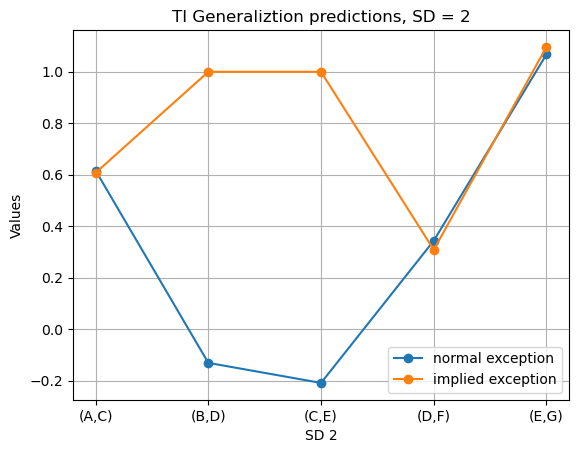

In [28]:
#SD2 

import matplotlib.pyplot as plt

arr_sd2_exp2 = []
arr_sd2_exp2.append(create_K_row_exp_2(1,3,alpha_prime,exp_pairs) @ a_exp_2)
arr_sd2_exp2.append(create_K_row_exp_2(2,4,alpha_prime,exp_pairs) @ a_exp_2)
arr_sd2_exp2.append(create_K_row_exp_2(3,5,alpha_prime,exp_pairs) @ a_exp_2)
arr_sd2_exp2.append(create_K_row_exp_2(4,6,alpha_prime,exp_pairs) @ a_exp_2)
arr_sd2_exp2.append(create_K_row_exp_2(5,7,alpha_prime,exp_pairs) @ a_exp_2)

arr_sd2_exp = []
arr_sd2_exp.append(K_row_exp(1,3) @ a_exp)
arr_sd2_exp.append(K_row_exp(2,4) @ a_exp)
arr_sd2_exp.append(K_row_exp(3,5) @ a_exp)
arr_sd2_exp.append(K_row_exp(4,6) @ a_exp)
arr_sd2_exp.append(K_row_exp(5,7) @ a_exp)

ordered_pairs = ["(A,C)", "(B,D)", "(C,E)", "(D,F)", "(E,G)"]
plt.plot(arr_sd2_exp, marker='o', label='normal exception')
plt.plot(arr_sd2_exp2, marker='o', label='implied exception')
plt.legend()
plt.title('TI Generaliztion predictions, SD = 2')
plt.xlabel('SD 2')
plt.ylabel('Values')
plt.xticks(range(len(arr_sd2_exp2)), labels=ordered_pairs)  # Adjusting x-ticks to show only integers
plt.grid(True)
plt.show()

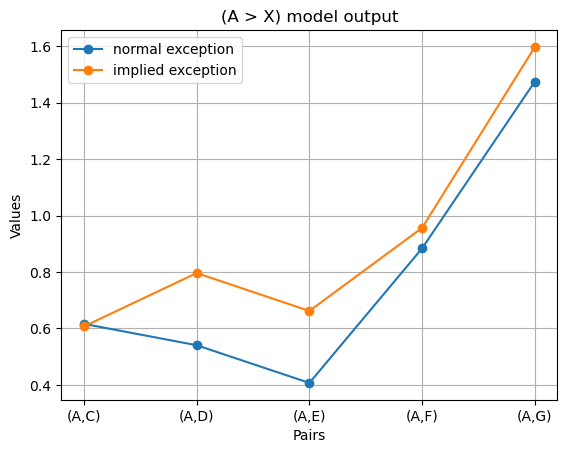

In [29]:

arr_exp2 = []
arr_exp2.append(create_K_row_exp_2(1,3,alpha_prime,exp_pairs) @ a_exp_2)
arr_exp2.append(create_K_row_exp_2(1,4,alpha_prime,exp_pairs) @ a_exp_2)
arr_exp2.append(create_K_row_exp_2(1,5,alpha_prime,exp_pairs) @ a_exp_2)
arr_exp2.append(create_K_row_exp_2(1,6,alpha_prime,exp_pairs) @ a_exp_2)
arr_exp2.append(create_K_row_exp_2(1,7,alpha_prime,exp_pairs) @ a_exp_2)

arr_exp = []
arr_exp.append(K_row_exp(1,3) @ a_exp)
arr_exp.append(K_row_exp(1,4) @ a_exp)
arr_exp.append(K_row_exp(1,5) @ a_exp)
arr_exp.append(K_row_exp(1,6) @ a_exp)
arr_exp.append(K_row_exp(1,7) @ a_exp)

ordered_pairs = ["(A,C)", "(A,D)", "(A,E)", "(A,F)", "(A,G)"]

plt.plot(arr_exp, marker='o', label='normal exception')
plt.plot(arr_exp2, marker='o', label='implied exception')
plt.legend()
plt.title('(A > X) model output')
plt.xlabel('Pairs')
plt.ylabel('Values')
plt.xticks(range(len(arr_sd2_exp2)), labels=ordered_pairs)  # Adjusting x-ticks to show only integers
plt.grid(True)
plt.show()

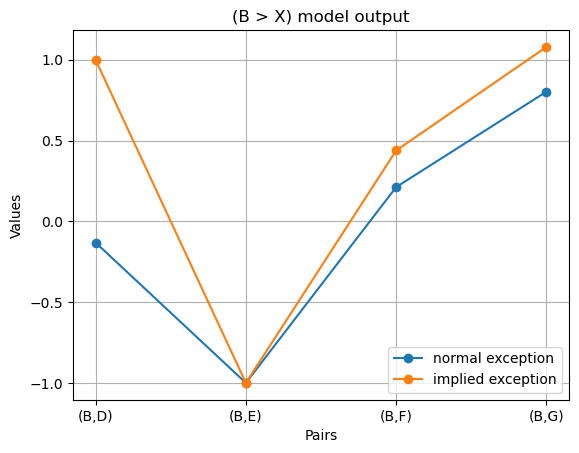

In [30]:
arr_exp2 = []
arr_exp2.append(create_K_row_exp_2(2,4,alpha_prime,exp_pairs) @ a_exp_2)
arr_exp2.append(create_K_row_exp_2(2,5,alpha_prime,exp_pairs) @ a_exp_2)
arr_exp2.append(create_K_row_exp_2(2,6,alpha_prime,exp_pairs) @ a_exp_2)
arr_exp2.append(create_K_row_exp_2(2,7,alpha_prime,exp_pairs) @ a_exp_2)

arr_exp = []
arr_exp.append(K_row_exp(2,4) @ a_exp)
arr_exp.append(K_row_exp(2,5) @ a_exp)
arr_exp.append(K_row_exp(2,6) @ a_exp)
arr_exp.append(K_row_exp(2,7) @ a_exp)

ordered_pairs = ["(B,D)", "(B,E)", "(B,F)", "(B,G)"]

plt.plot(arr_exp, marker='o', label='normal exception')
plt.plot(arr_exp2, marker='o', label='implied exception')
plt.legend()
plt.title('(B > X) model output')
plt.xlabel('Pairs')
plt.ylabel('Values')
plt.xticks(range(len(arr_exp)), labels=ordered_pairs)  # Adjusting x-ticks to show only integers
plt.grid(True)
plt.show()

-0.24816760908917201
-0.34341622503057523


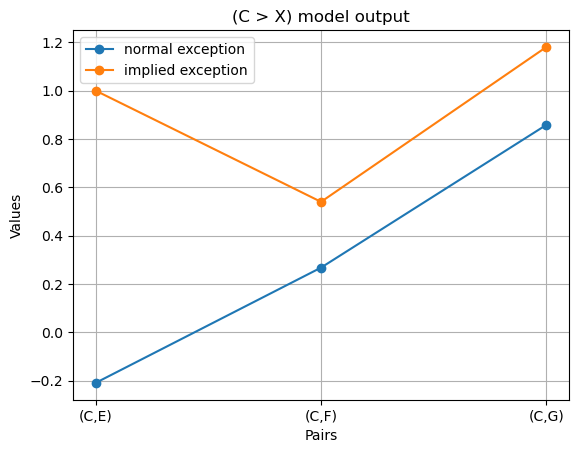

In [31]:
print(create_K_row_exp_2(6,4,alpha_prime,exp_pairs) @ a_exp_2)
print(K_row_exp(6,4) @ a_exp)

arr_exp2 = []
arr_exp2.append(create_K_row_exp_2(3,5,alpha_prime,exp_pairs) @ a_exp_2)
arr_exp2.append(create_K_row_exp_2(3,6,alpha_prime,exp_pairs) @ a_exp_2)
arr_exp2.append(create_K_row_exp_2(3,7,alpha_prime,exp_pairs) @ a_exp_2)

arr_exp = []
arr_exp.append(K_row_exp(3,5) @ a_exp)
arr_exp.append(K_row_exp(3,6) @ a_exp)
arr_exp.append(K_row_exp(3,7) @ a_exp)

ordered_pairs = ["(C,E)", "(C,F)", "(C,G)"]

plt.plot(arr_exp, marker='o', label='normal exception')
plt.plot(arr_exp2, marker='o', label='implied exception')
plt.legend()
plt.title('(C > X) model output')
plt.xlabel('Pairs')
plt.ylabel('Values')
plt.xticks(range(len(arr_exp)), labels=ordered_pairs)  # Adjusting x-ticks to show only integers
plt.grid(True)
plt.show()

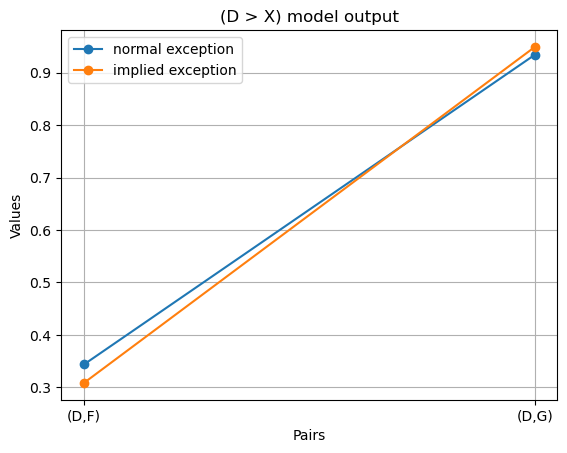

In [32]:
arr_exp2 = []
arr_exp2.append(create_K_row_exp_2(4,6,alpha_prime,exp_pairs) @ a_exp_2)
arr_exp2.append(create_K_row_exp_2(4,7,alpha_prime,exp_pairs) @ a_exp_2)

arr_exp = []
arr_exp.append(K_row_exp(4,6) @ a_exp)
arr_exp.append(K_row_exp(4,7) @ a_exp)

ordered_pairs = ["(D,F)", "(D,G)"]

plt.plot(arr_exp, marker='o', label='normal exception')
plt.plot(arr_exp2, marker='o', label='implied exception')
plt.legend()
plt.title('(D > X) model output')
plt.xlabel('Pairs')
plt.ylabel('Values')
plt.xticks(range(len(arr_exp)), labels=ordered_pairs)  # Adjusting x-ticks to show only integers
plt.grid(True)
plt.show()

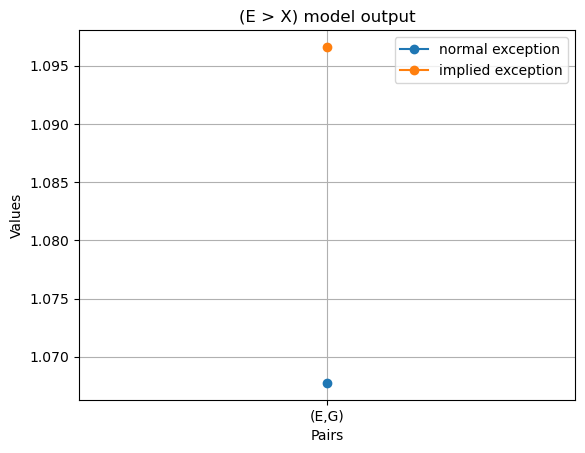

In [33]:
arr_exp2 = []
arr_exp2.append(create_K_row_exp_2(5,7,alpha_prime,exp_pairs) @ a_exp_2)

arr_exp = []
arr_exp.append(K_row_exp(5,7) @ a_exp)

ordered_pairs = ["(E,G)"]

plt.plot(arr_exp, marker='o', label='normal exception')
plt.plot(arr_exp2, marker='o', label='implied exception')
plt.legend()
plt.title('(E > X) model output')
plt.xlabel('Pairs')
plt.ylabel('Values')
plt.xticks(range(len(arr_exp)), labels=ordered_pairs)  # Adjusting x-ticks to show only integers
plt.grid(True)
plt.show()

In [34]:
print(K_row_exp(4,6) @ a_exp)
print(K_row_exp(4,7) @ a_exp)

0.34341622503057523
0.9342030167142279
